## Flight Delay Analysis

## Data Pre-processing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [33]:
# Read the flight data
df = pd.read_csv('flights_data.csv',low_memory=False)
print(df)

         FLIGHT_NUMBER  MONTH  DAY  DAY_OF_WEEK AIRLINE ORIGIN_AIRPORT  \
0                   98      1    1            4      AS            ANC   
1                 2336      1    1            4      AA            LAX   
2                  840      1    1            4      US            SFO   
3                  258      1    1            4      AA            LAX   
4                  135      1    1            4      AS            SEA   
...                ...    ...  ...          ...     ...            ...   
5819074            688     12   31            4      B6            LAX   
5819075            745     12   31            4      B6            JFK   
5819076           1503     12   31            4      B6            JFK   
5819077            333     12   31            4      B6            MCO   
5819078            839     12   31            4      B6            JFK   

        DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  DEPARTURE_TIME  \
0                       SEA                

In [3]:
# Handle missing data
missing_values = df.isnull().sum()
display(missing_values)

missing_percentage = (missing_values/len(df)*100)
display(missing_percentage)

missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})
print(missing_summary)

FLIGHT_NUMBER               0
MONTH                       0
DAY                         0
DAY_OF_WEEK                 0
AIRLINE                     0
ORIGIN_AIRPORT              0
DESTINATION_AIRPORT         0
SCHEDULED_DEPARTURE         0
DEPARTURE_TIME          86153
SCHEDULED_ARRIVAL           0
ARRIVAL_TIME            92513
ARRIVAL_DELAY          105071
dtype: int64

FLIGHT_NUMBER          0.000000
MONTH                  0.000000
DAY                    0.000000
DAY_OF_WEEK            0.000000
AIRLINE                0.000000
ORIGIN_AIRPORT         0.000000
DESTINATION_AIRPORT    0.000000
SCHEDULED_DEPARTURE    0.000000
DEPARTURE_TIME         1.480526
SCHEDULED_ARRIVAL      0.000000
ARRIVAL_TIME           1.589822
ARRIVAL_DELAY          1.805629
dtype: float64

                     Missing Values  Percentage
FLIGHT_NUMBER                     0    0.000000
MONTH                             0    0.000000
DAY                               0    0.000000
DAY_OF_WEEK                       0    0.000000
AIRLINE                           0    0.000000
ORIGIN_AIRPORT                    0    0.000000
DESTINATION_AIRPORT               0    0.000000
SCHEDULED_DEPARTURE               0    0.000000
DEPARTURE_TIME                86153    1.480526
SCHEDULED_ARRIVAL                 0    0.000000
ARRIVAL_TIME                  92513    1.589822
ARRIVAL_DELAY                105071    1.805629


In [4]:
# Filling the missing data with the mean 
mean_DEPARTURE_TIME = df['DEPARTURE_TIME'].mean()
df['DEPARTURE_TIME'] = df['DEPARTURE_TIME'].fillna(mean_DEPARTURE_TIME)
print("This number will be used to replace any cells that have an empty value under the departure time column: \n"
      ,mean_DEPARTURE_TIME)

mean_ARRIVAL_TIME = df['ARRIVAL_TIME'].mean()
df['ARRIVAL_TIME'] = df['ARRIVAL_TIME'].fillna(mean_ARRIVAL_TIME)
print("This number will be used to replace any cells that have an empty value under the arrival time column: \n"
      ,mean_ARRIVAL_TIME)

mean_ARRIVAL_DELAY = df['ARRIVAL_DELAY'].mean()
df['ARRIVAL_DELAY'] = df['ARRIVAL_DELAY'].fillna(mean_ARRIVAL_DELAY)
print("This number will be used to replace any cells that have an empty value under the arrival delay column: \n"
      ,mean_ARRIVAL_DELAY)

This number will be used to replace any cells that have an empty value under the departure time column: 
 1335.2044390595659
This number will be used to replace any cells that have an empty value under the arrival time column: 
 1476.4911879126164
This number will be used to replace any cells that have an empty value under the arrival delay column: 
 4.407057357987598


In [5]:
# Updated missing values - all data is filled 
missing_values = df.isnull().sum()
display(missing_values)

missing_percentage = (missing_values/len(df)*100)
display(missing_percentage)

missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})
print(missing_summary)

FLIGHT_NUMBER          0
MONTH                  0
DAY                    0
DAY_OF_WEEK            0
AIRLINE                0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
DEPARTURE_TIME         0
SCHEDULED_ARRIVAL      0
ARRIVAL_TIME           0
ARRIVAL_DELAY          0
dtype: int64

FLIGHT_NUMBER          0.0
MONTH                  0.0
DAY                    0.0
DAY_OF_WEEK            0.0
AIRLINE                0.0
ORIGIN_AIRPORT         0.0
DESTINATION_AIRPORT    0.0
SCHEDULED_DEPARTURE    0.0
DEPARTURE_TIME         0.0
SCHEDULED_ARRIVAL      0.0
ARRIVAL_TIME           0.0
ARRIVAL_DELAY          0.0
dtype: float64

                     Missing Values  Percentage
FLIGHT_NUMBER                     0         0.0
MONTH                             0         0.0
DAY                               0         0.0
DAY_OF_WEEK                       0         0.0
AIRLINE                           0         0.0
ORIGIN_AIRPORT                    0         0.0
DESTINATION_AIRPORT               0         0.0
SCHEDULED_DEPARTURE               0         0.0
DEPARTURE_TIME                    0         0.0
SCHEDULED_ARRIVAL                 0         0.0
ARRIVAL_TIME                      0         0.0
ARRIVAL_DELAY                     0         0.0


In [6]:
# statistical summary of the dataset
print(df.describe())

print(df.info())

print(df.shape)

print(df.mode())

       FLIGHT_NUMBER         MONTH           DAY   DAY_OF_WEEK  \
count   5.819079e+06  5.819079e+06  5.819079e+06  5.819079e+06   
mean    2.173093e+03  6.524085e+00  1.570459e+01  3.926941e+00   
std     1.757064e+03  3.405137e+00  8.783425e+00  1.988845e+00   
min     1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
25%     7.300000e+02  4.000000e+00  8.000000e+00  2.000000e+00   
50%     1.690000e+03  7.000000e+00  1.600000e+01  4.000000e+00   
75%     3.230000e+03  9.000000e+00  2.300000e+01  6.000000e+00   
max     9.855000e+03  1.200000e+01  3.100000e+01  7.000000e+00   

       SCHEDULED_DEPARTURE  DEPARTURE_TIME  SCHEDULED_ARRIVAL  ARRIVAL_TIME  \
count         5.819079e+06    5.819079e+06       5.819079e+06  5.819079e+06   
mean          1.329602e+03    1.335204e+03       1.493808e+03  1.476491e+03   
std           4.837518e+02    4.927347e+02       5.071647e+02  5.221192e+02   
min           1.000000e+00    1.000000e+00       1.000000e+00  1.000000e+00   
25%       

## Univariate Analysis

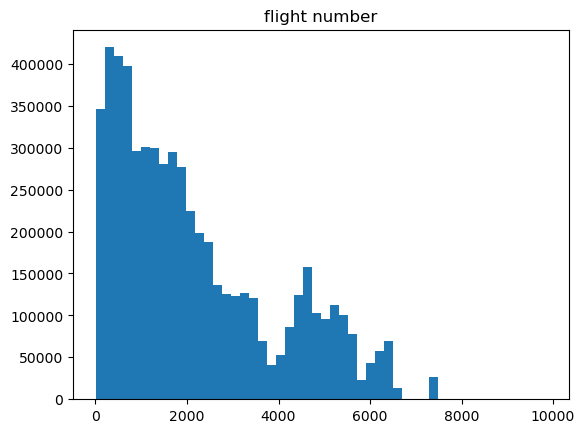

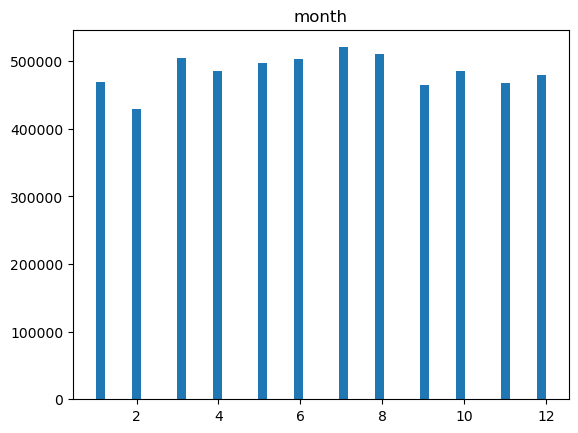

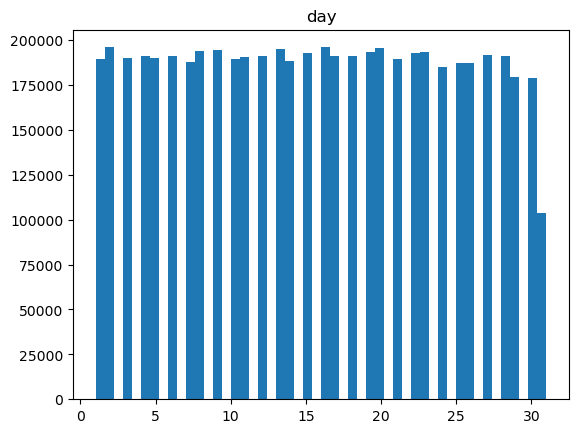

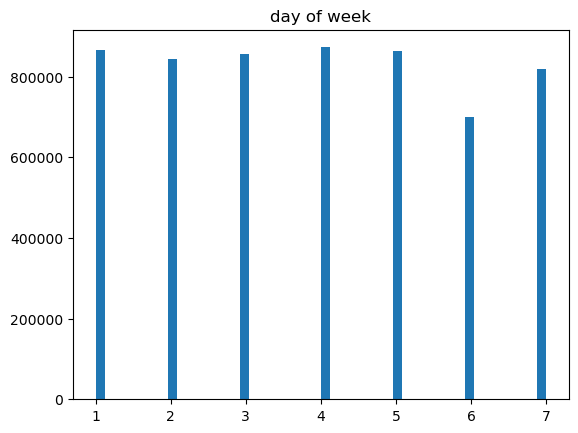

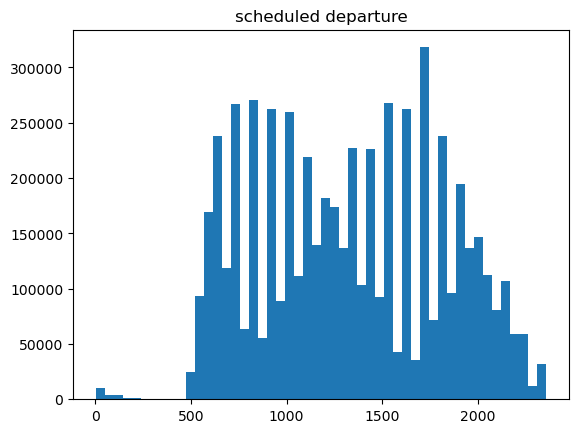

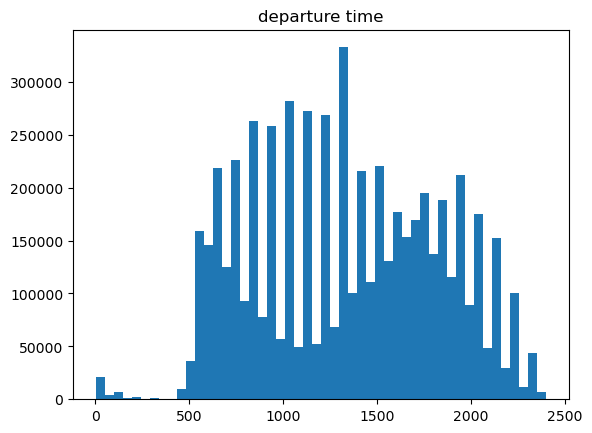

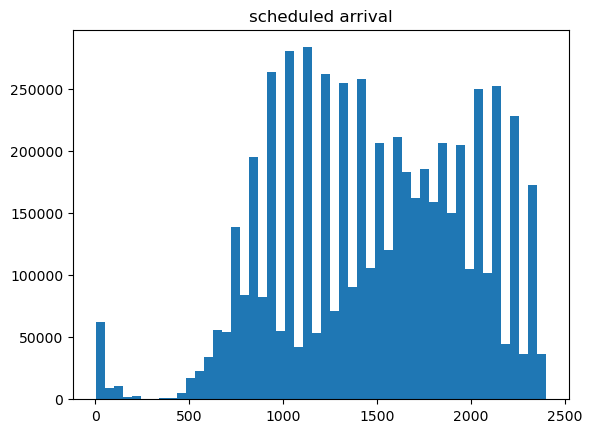

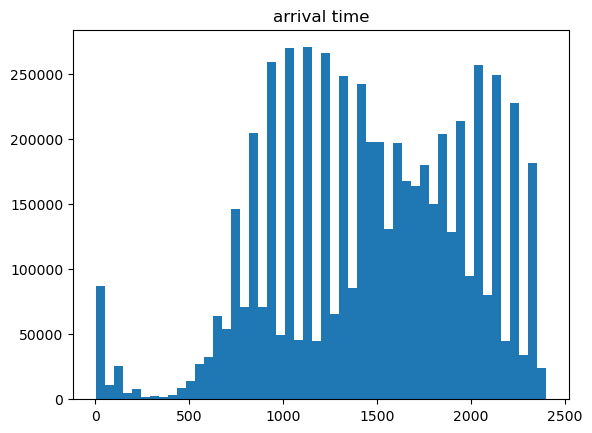

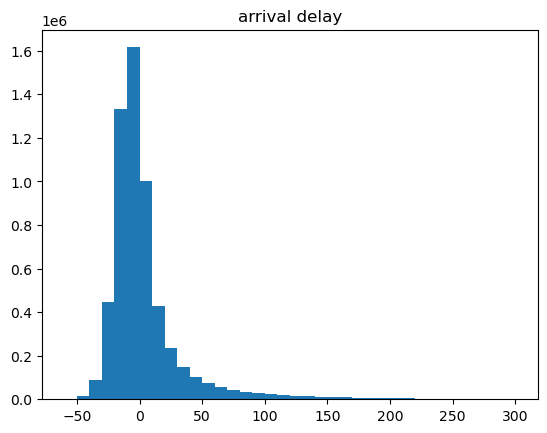

In [7]:
# Historgram for non categorial values
plt.hist(df.FLIGHT_NUMBER, bins = 50)
plt.title('flight number')
plt.show()

plt.hist(df.MONTH, bins = 50)
plt.title('month')
plt.show()


plt.hist(df.DAY, bins = 50)
plt.title('day')
plt.show()


plt.hist(df.DAY_OF_WEEK, bins = 50)
plt.title('day of week')
plt.show()


plt.hist(df.SCHEDULED_DEPARTURE, bins = 50)
plt.title('scheduled departure')
plt.show()


plt.hist(df.DEPARTURE_TIME, bins = 50)
plt.title('departure time')
plt.show()


plt.hist(df.SCHEDULED_ARRIVAL, bins = 50)
plt.title('scheduled arrival')
plt.show()


plt.hist(df.ARRIVAL_TIME, bins = 50)
plt.title('arrival time')
plt.show()


plt.hist(df.ARRIVAL_DELAY, bins = range(-60,301,10))
plt.title('arrival delay')
plt.show()

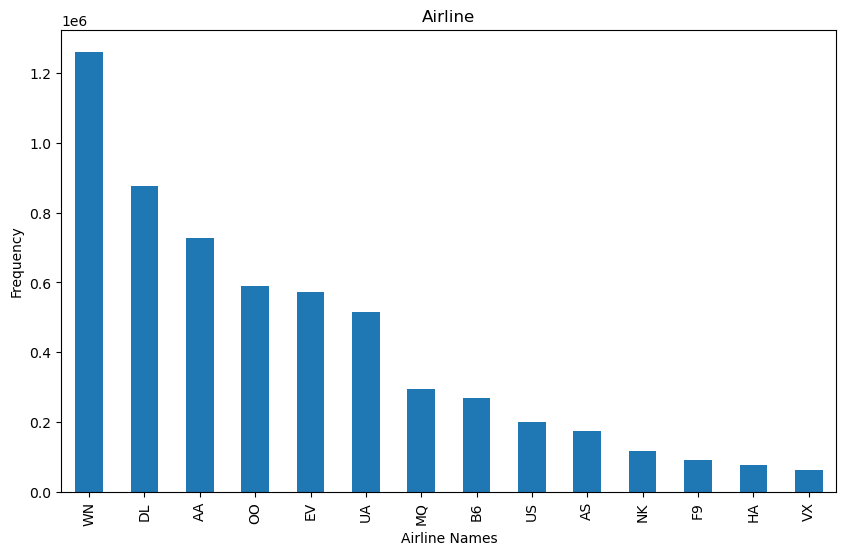

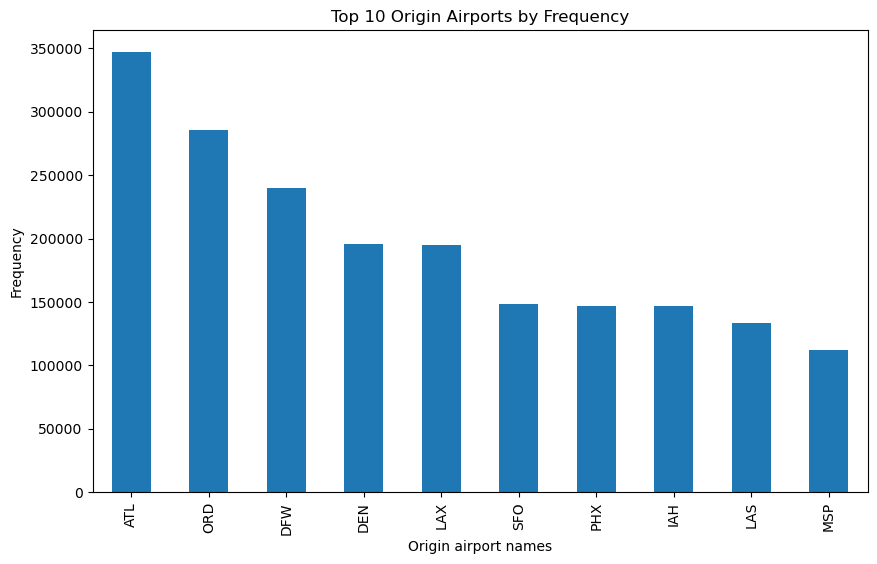

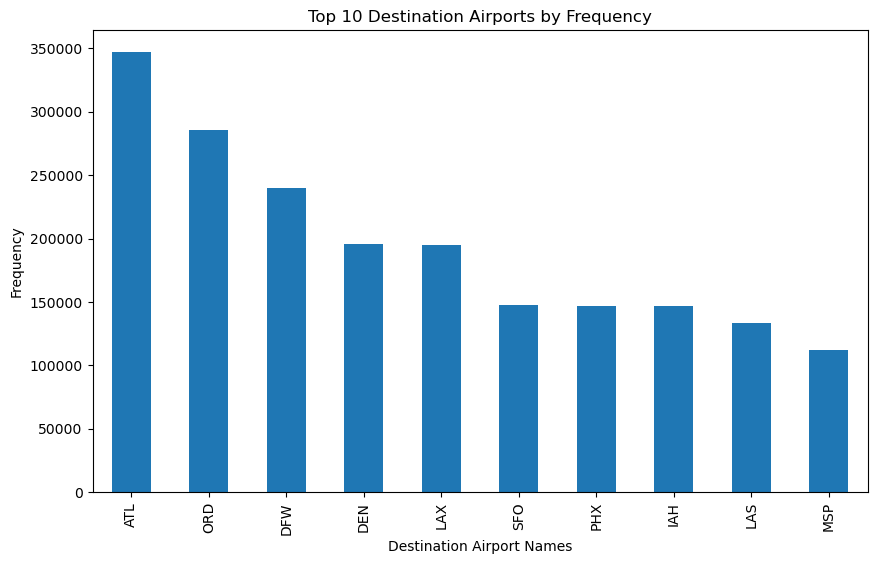

In [8]:
# Bar char for the categorial values 
airline_counts = df.AIRLINE.value_counts()

plt.figure(figsize=(10,6))
airline_counts.plot(kind='bar')
plt.title('Airline')
plt.xlabel('Airline Names')
plt.ylabel('Frequency')
plt.show()

N = 10
top_airports = df['ORIGIN_AIRPORT'].value_counts().head(N)

plt.figure(figsize=(10,6))
top_airports.plot(kind='bar')
plt.title(f'Top {N} Origin Airports by Frequency')
plt.xlabel('Origin airport names')
plt.ylabel('Frequency')
plt.show()

N = 10
top_destination_airports = df['DESTINATION_AIRPORT'].value_counts().head(N)

plt.figure(figsize=(10,6))
top_destination_airports.plot(kind='bar')
plt.title(f'Top {N} Destination Airports by Frequency')
plt.xlabel('Destination Airport Names')
plt.ylabel('Frequency')
plt.show()

In [9]:
# Observations 
# Some anomalies that I noticed: 
# Since delta airlines is the largest and busiest, I would assume 
# delta would be the highest frequency when comparing to the other airlines
# and not southwest 
# Hawaiian airlines is higher than virgin america which is strange 
# since I thought hawaiian airlines would not serve as many flights 
# compared to virgin since hawaiian airlines seems to be smaller with 
# fewer flights under it from an initial glance
# Another thing that is strange is that the .csv had missing values and were 
# still included in the data set since I thought that if a flight data had missing 
# values, the data would not be taken into account since it is not accurate 
# and has to rely on using other flight data

# some patterns that I noticed: 
# Atlanta is the most popular origin and destination airport 
# which makes sense since it is the most busiest
# Summer time: May-August, are the most busiest months for flights 
# due to summer vacation
# Weekdays have more scheduled departing flights than weekends

## Initial Data Exploration

In [10]:
# Checking first few rows 
print(df.head(10))

   FLIGHT_NUMBER  MONTH  DAY  DAY_OF_WEEK AIRLINE ORIGIN_AIRPORT  \
0             98      1    1            4      AS            ANC   
1           2336      1    1            4      AA            LAX   
2            840      1    1            4      US            SFO   
3            258      1    1            4      AA            LAX   
4            135      1    1            4      AS            SEA   
5            806      1    1            4      DL            SFO   
6            612      1    1            4      NK            LAS   
7           2013      1    1            4      US            LAX   
8           1112      1    1            4      AA            SFO   
9           1173      1    1            4      DL            LAS   

  DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  DEPARTURE_TIME  SCHEDULED_ARRIVAL  \
0                 SEA                    5          2354.0                430   
1                 PBI                   10             2.0                750   
2       

In [11]:
# Summary Statistic for each non categorial column
print("For flight number: \n",df.FLIGHT_NUMBER.describe())

print("\nFor month: \n",df.MONTH.describe())

print("\nFor day: \n",df.DAY.describe())

print("\nFor day of week: \n",df.DAY_OF_WEEK.describe())

print("\nFor scheduled departure: \n",df.SCHEDULED_DEPARTURE.describe())

print("\nFor departure time: \n",df.DEPARTURE_TIME.describe())

print("\nFor scheduled arrival: \n",df.SCHEDULED_ARRIVAL.describe())

print("\nFor arrival time: \n",df.ARRIVAL_TIME.describe())

print("\nFor arrival delay: \n",df.ARRIVAL_DELAY.describe())

For flight number: 
 count    5.819079e+06
mean     2.173093e+03
std      1.757064e+03
min      1.000000e+00
25%      7.300000e+02
50%      1.690000e+03
75%      3.230000e+03
max      9.855000e+03
Name: FLIGHT_NUMBER, dtype: float64

For month: 
 count    5.819079e+06
mean     6.524085e+00
std      3.405137e+00
min      1.000000e+00
25%      4.000000e+00
50%      7.000000e+00
75%      9.000000e+00
max      1.200000e+01
Name: MONTH, dtype: float64

For day: 
 count    5.819079e+06
mean     1.570459e+01
std      8.783425e+00
min      1.000000e+00
25%      8.000000e+00
50%      1.600000e+01
75%      2.300000e+01
max      3.100000e+01
Name: DAY, dtype: float64

For day of week: 
 count    5.819079e+06
mean     3.926941e+00
std      1.988845e+00
min      1.000000e+00
25%      2.000000e+00
50%      4.000000e+00
75%      6.000000e+00
max      7.000000e+00
Name: DAY_OF_WEEK, dtype: float64

For scheduled departure: 
 count    5.819079e+06
mean     1.329602e+03
std      4.837518e+02
min      1.

In [12]:
# Summary statistic for categorial columns
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder_1 = LabelEncoder()
label_encoder_2 = LabelEncoder()

df['AIRLINE'] = label_encoder.fit_transform(df['AIRLINE'])
df['ORIGIN_AIRPORT'] = label_encoder_1.fit_transform(df['ORIGIN_AIRPORT'])
df['DESTINATION_AIRPORT'] = label_encoder_2.fit_transform(df['DESTINATION_AIRPORT'])
print(df)

print("For airline: \n",df.AIRLINE.describe())

print("\nFor origin airport: \n",df.ORIGIN_AIRPORT.describe())

print("\nFor destination airport: \n",df.DESTINATION_AIRPORT.describe())

         FLIGHT_NUMBER  MONTH  DAY  DAY_OF_WEEK  AIRLINE  ORIGIN_AIRPORT  \
0                   98      1    1            4        1             323   
1                 2336      1    1            4        0             482   
2                  840      1    1            4       11             584   
3                  258      1    1            4        0             482   
4                  135      1    1            4        1             583   
...                ...    ...  ...          ...      ...             ...   
5819074            688     12   31            4        2             482   
5819075            745     12   31            4        2             472   
5819076           1503     12   31            4        2             472   
5819077            333     12   31            4        2             499   
5819078            839     12   31            4        2             472   

         DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  DEPARTURE_TIME  \
0                 

In [13]:
# Identify the percentage of flights delayed by more than 15 minutes
delayed_flights = df[df['ARRIVAL_DELAY'] > 15]
percentage_delayed = len(delayed_flights) / len(df) * 100

print(f"{percentage_delayed:.2f}% of flights were delayed by more than 15 minutes.")

17.59% of flights were delayed by more than 15 minutes.


## Visual Analysis

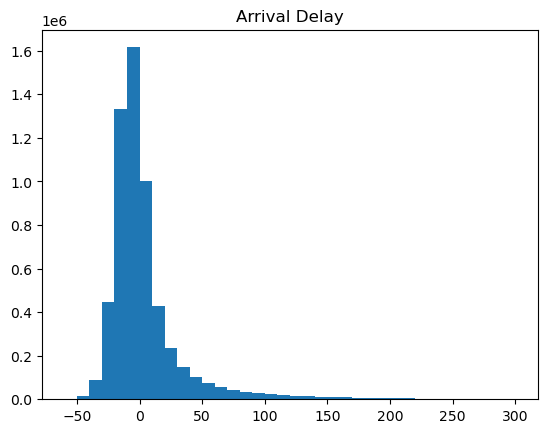

In [14]:
# Visualize the distribution of flight delays
plt.hist(df.ARRIVAL_DELAY, bins = range(-60,301,10))
plt.title('Arrival Delay')
plt.show()

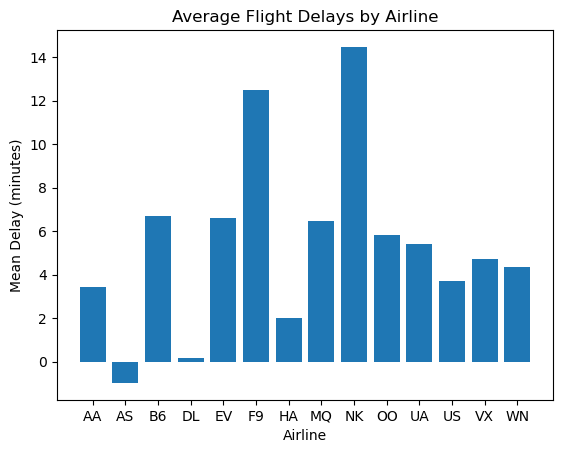

In [34]:
# Compare average delays across different airlines
mean_arrival_delays = df.groupby('AIRLINE')['ARRIVAL_DELAY'].mean()

plt.bar(mean_arrival_delays.index, mean_arrival_delays.values)

plt.xlabel('Airline')
plt.ylabel('Mean Delay (minutes)')
plt.title('Average Flight Delays by Airline')

plt.show()

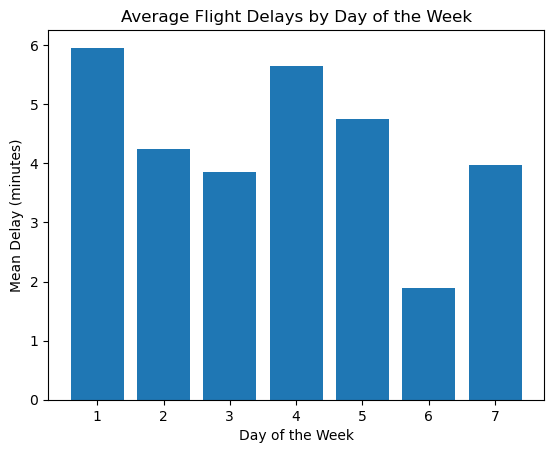

In [16]:
# Investigate the impact of the day of the week on delays
mean_day_of_week_delays = df.groupby('DAY_OF_WEEK')['ARRIVAL_DELAY'].mean()

plt.bar(mean_day_of_week_delays.index, mean_day_of_week_delays.values)

plt.xlabel('Day of the Week')
plt.ylabel('Mean Delay (minutes)')
plt.title('Average Flight Delays by Day of the Week')

plt.show()

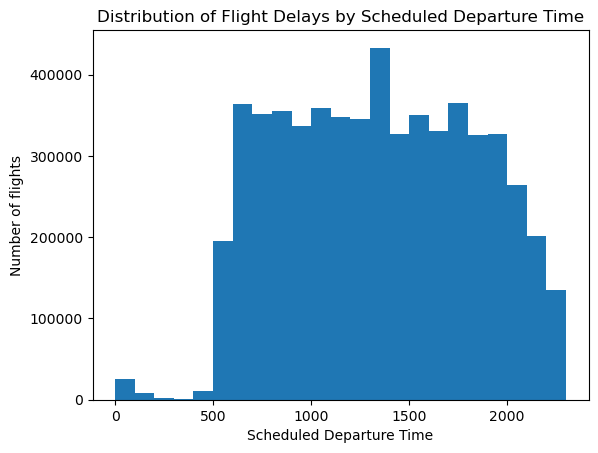

In [17]:
# Analyze if there's any pattern of delays based on 
# the scheduled departure hour
plt.hist(df['DEPARTURE_TIME'], bins = range(0,2400,100))

plt.xlabel('Scheduled Departure Time')
plt.ylabel('Number of flights')
plt.title('Distribution of Flight Delays by Scheduled Departure Time')

plt.show()

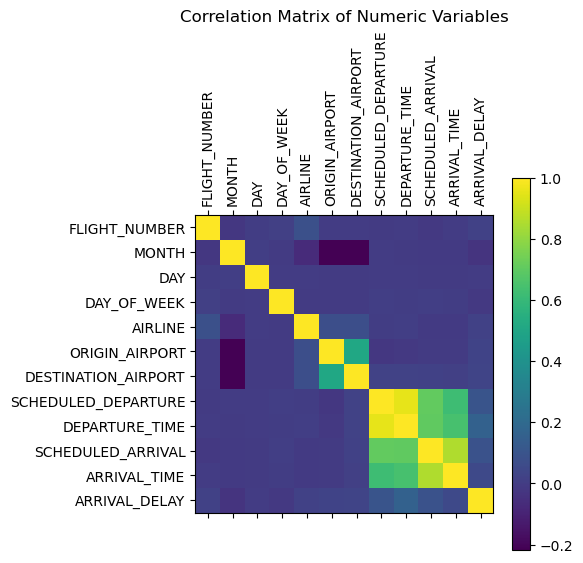

In [18]:
# Understand the correlation between the various numeric variables
corr = df.corr()

plt.matshow(corr)

plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.colorbar()
plt.title('Correlation Matrix of Numeric Variables')

plt.show()

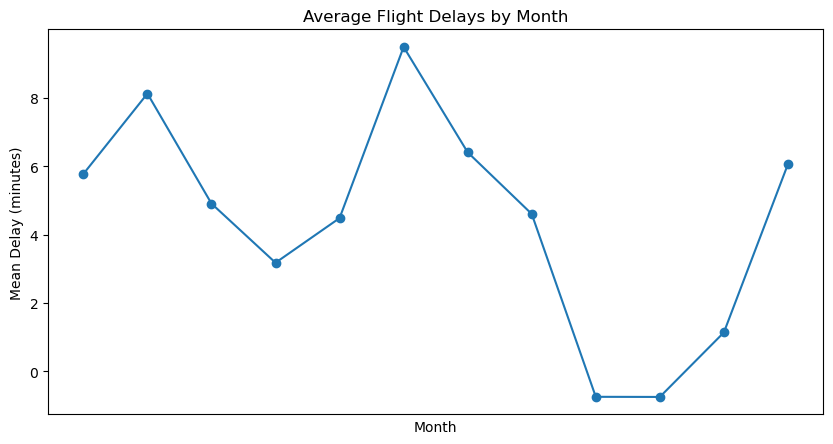

In [19]:
# Check if there's any seasonality in delays
df['MONTH'] = pd.to_datetime(df['MONTH'], format='%Y-%m')

mean_month_delays = df.groupby('MONTH')['ARRIVAL_DELAY'].mean()

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(mean_month_delays.index, mean_month_delays.values, marker='o')

plt.xlabel('Month')
plt.ylabel('Mean Delay (minutes)')
plt.title('Average Flight Delays by Month')

plt.show()

# Each marker represents one month

## Deep Dive Analysis

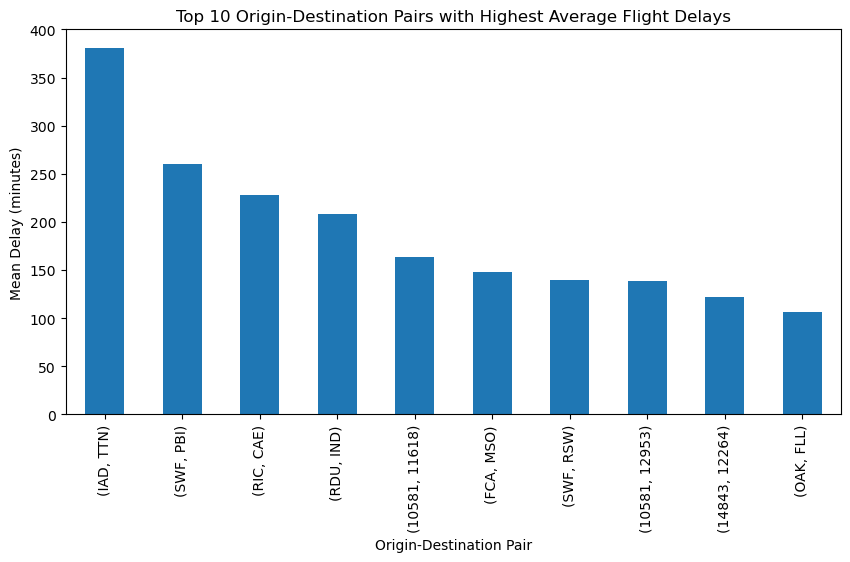

In [43]:
# Identify the origin-destination paris with the highest average delays
mean_delays = df.groupby(['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT'])['ARRIVAL_DELAY'].mean()

N = 10
top_pairs = mean_delays.sort_values(ascending=False).head(N)

fig, ax = plt.subplots(figsize=(10, 5))
top_pairs.plot(kind='bar', ax=ax)

# Add labels and title
plt.xlabel('Origin-Destination Pair')
plt.ylabel('Mean Delay (minutes)')
plt.title(f'Top {N} Origin-Destination Pairs with Highest Average Flight Delays')

# Show the plot
plt.show()

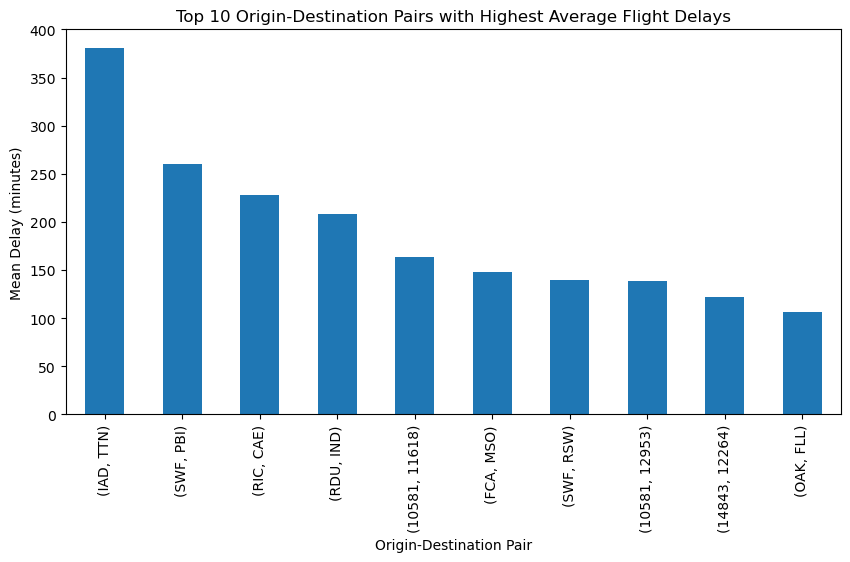

In [36]:
# Analyze the 10 most frequent flight routes and their average delays
mean_delays = df.groupby(['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT'])['ARRIVAL_DELAY'].mean()

N = 10
top_pairs = mean_delays.sort_values(ascending=False).head(N)

fig, ax = plt.subplots(figsize=(10, 5))
top_pairs.plot(kind='bar', ax=ax)

plt.xlabel('Origin-Destination Pair')
plt.ylabel('Mean Delay (minutes)')
plt.title(f'Top {N} Origin-Destination Pairs with Highest Average Flight Delays')

plt.show()

# The top 3 routes and their average delays are based on the top 10 flight routes
# IAD-TTN with about 370 minutes 
# SWF-PBI with 270 minutes 
# RIC-CAE with 240 minutes 

<Axes: xlabel='DESTINATION_AIRPORT', ylabel='ORIGIN_AIRPORT'>

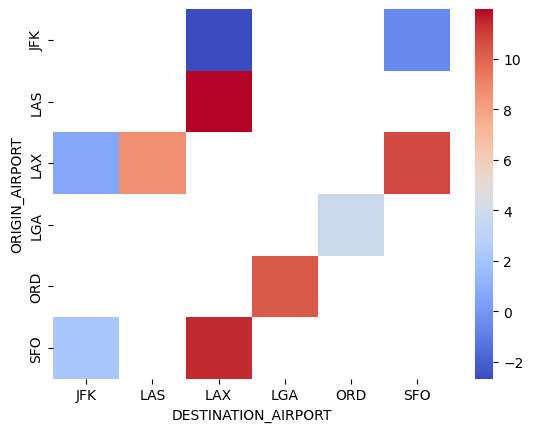

In [37]:
# Visualize the relationship between the origin and destination
# airports using a heatmap
top_10_pairs = df.groupby(['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT']).size().nlargest(10).index.tolist()
df_top_10_pairs = df[df.set_index(['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT']).index.isin(top_10_pairs)]

heatmap_data = pd.pivot_table(df_top_10_pairs, values='ARRIVAL_DELAY', index=['ORIGIN_AIRPORT'], columns=['DESTINATION_AIRPORT'], aggfunc='mean')
sns.heatmap(heatmap_data, cmap='coolwarm')

## Insights & Recommendations

In [23]:
# Document the insights derived from the visualizations and deep-dive analysis
# From the visualizations:
# Overall from the arrival delay graph, most flights do not experience delay by looking at the -50 to 0 bin in the 
# histogram
# AS, DL, HL are the best airlines that minimize the delay when compared to the other airlines 
# Saturday and Wednesday are the best days to fly out of the days of the week 
# Flights before 10:00am and after 8:00pm are the best times to fly with few delays
# Schedule arrival, departure time, and arrival time are the biggest factors for delay when looking at the correlation
# matrix since they are close to one 

In [24]:
# Provide recommendations for airlines to reduce delays 
# I would recommend the following to reduce delays: 
# Improving airline internal management 
# Improving flow of boarding process 
# Increase shuttle transfer vehicles for long distanced gates 

In [25]:
# Advise passengers on the best times to fly or airlines to pick to avoid delays based on your findings
# I would advise that the best times to fly are on Saturdays since there is minimal delay in minutes 
# compared to the other days of the week in terms of delay. The secondary option is on Wednesday 
# In general, flights that are scheduled to depart before 10:00am are also good times to book a flight since 
# there is not a lot of air traffic during those times. September, October, and November are also good months to fly 
# with low flight traffic meaning little to no delays. 